# Pymaceuticals Inc.
---

### Analysis

- Three observations emerge from the Pymaceuticals Inc. Mouse Study:

Capomulin, the drug of interest in this study, exhibits a notable effect on reducing the average tumor volume (measured in mm3) in mice compared to other drugs. The average tumor volumes for mice treated with Capomulin and Ramicane are particularly lower, standing at 40.675 mm3 and 40.216 mm3, respectively. In contrast, mice treated with other regimens showed higher tumor volumes, exceeding 52 mm3.

A specific mouse labeled l509, which was treated with Capomulin, displayed a distinctive tumor volume pattern. Initially, there was a noticeable increase in tumor volume, reaching its peak at day 18. Subsequently, there was a decline at day 20, followed by another increase in tumor volume at day 40.

The gender distribution among the mice in the study was evenly split. The bar chart clearly indicates that a significant number of timepoints were recorded for mice treated with Capomulin (230 timepoints) and Ramicane (228 timepoints). This suggests that a substantial dataset was analyzed for these drug regimens during the study.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])



# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice.
mice_total = len(merged_data_df['Mouse ID'].unique())
mice_total


249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicated = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
mice_duplicated_ID = merged_data_df.loc[mice_duplicated, 'Mouse ID'].unique()



In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicated_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == mice_duplicated_ID[0]]
mice_duplicated_ID_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_analysis_df = merged_data_df.drop(mice_duplicated_ID_data.index)
data_analysis_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
# Checking the number of mice in the clean DataFrame.
mice_clean = len(data_analysis_df['Mouse ID'].unique())
mice_clean


248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_grouped_df = data_analysis_df.groupby(["Drug Regimen"])
mean_tumor_volume = drug_regimen_grouped_df["Tumor Volume (mm3)"].mean()
median_tumor_volume =  drug_regimen_grouped_df["Tumor Volume (mm3)"].median()
var_tumor_volume =  drug_regimen_grouped_df["Tumor Volume (mm3)"].var()
stdev_tumor_volume = drug_regimen_grouped_df["Tumor Volume (mm3)"].std()
SEM_tumor_volume = drug_regimen_grouped_df["Tumor Volume (mm3)"].sem()


summary_stats_df = pd.DataFrame({"Tumor Volume Mean":mean_tumor_volume,
                                "Tumor Volume Median":median_tumor_volume,
                                 "Tumor Volume Variance":var_tumor_volume,
                                "Tumor Volume Std.Dev.":stdev_tumor_volume,
                                 "Tumor Volume Std. Err":SEM_tumor_volume})



summary_stats_df = summary_stats_df[["Tumor Volume Mean",
                                    "Tumor Volume Median",
                                    "Tumor Volume Variance",
                                     "Tumor Volume Std.Dev.",
                                    "Tumor Volume Std. Err"]]


summary_stats_df
    




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate a summary statistics table using aggregation method
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Rename the columns in the summary statistics table
summary_stats.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                         "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

# Display the summary statistics table
print("Summary Statistics Table:")
print(summary_stats)


Summary Statistics Table:
              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volum

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df = {"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']}

data_analysis_df.groupby(['Drug Regimen']).agg(summary_agg_df)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

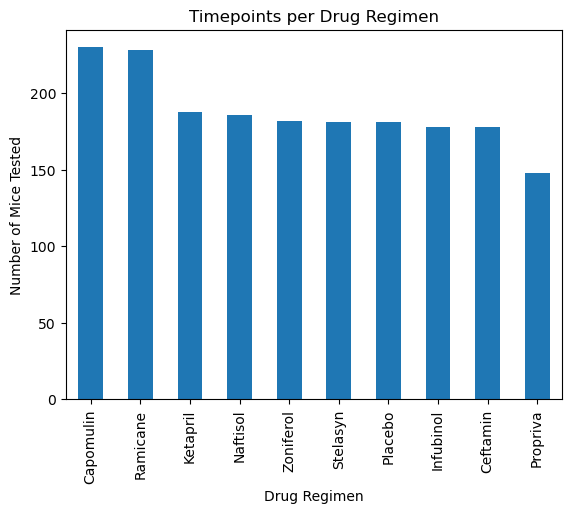

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = data_analysis_df["Drug Regimen"].value_counts()
drug_regimen

drug_regimen.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

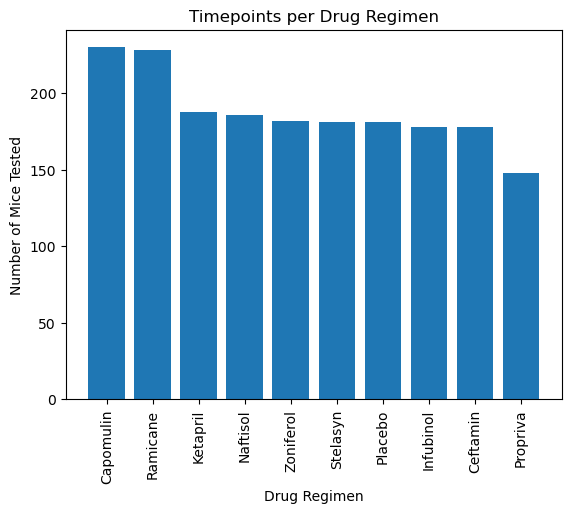

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen = data_analysis_df["Drug Regimen"].value_counts()
plt.bar(drug_regimen.index.values,drug_regimen.values)

plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

plt.show()


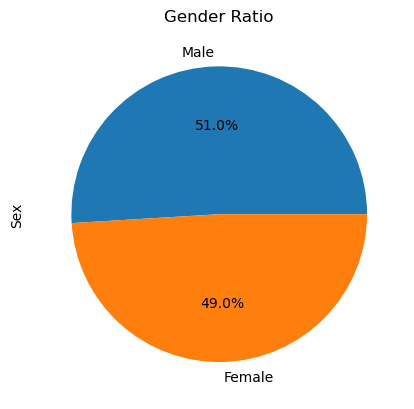

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = data_analysis_df["Sex"].value_counts()
sex.plot(kind="pie",autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.show()


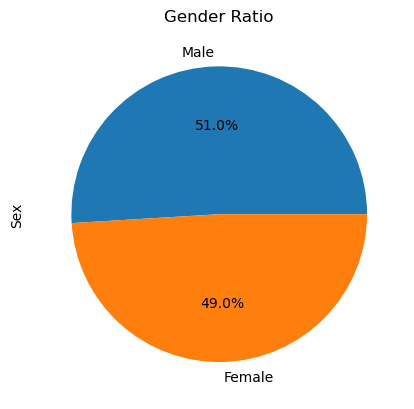

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = data_analysis_df["Sex"].value_counts()

plt.title("Gender Ratio")
plt.ylabel("Sex")
plt.pie(sex.values, labels=sex.index.values, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:

 #Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


tumor_max = data_analysis_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_max = tumor_max.reset_index()

merged_tumor_vol = tumor_max.merge(data_analysis_df,on=['Mouse ID','Timepoint'],how="left")
merged_tumor_vol


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_treatment:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final = merged_tumor_vol.loc[merged_tumor_vol["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
        
        
        # add subset 
    list_tumor_vol.append(tumor_vol_final)
        
        
        # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
        
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_bound) | (tumor_vol_final > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


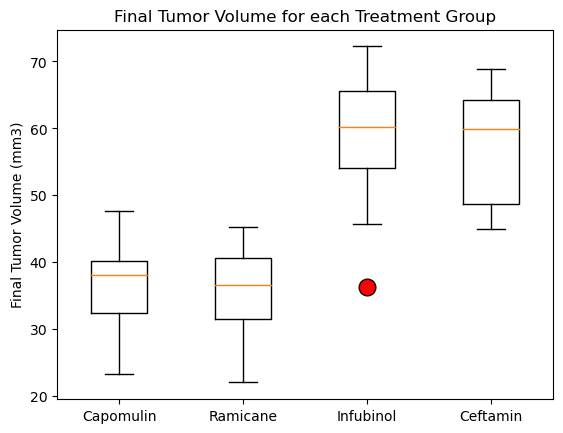

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out_orange = dict(markerfacecolor='red',markersize=12)
plt.boxplot(list_tumor_vol, labels = list_treatment,flierprops=out_orange)
plt.title('Final Tumor Volume for each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

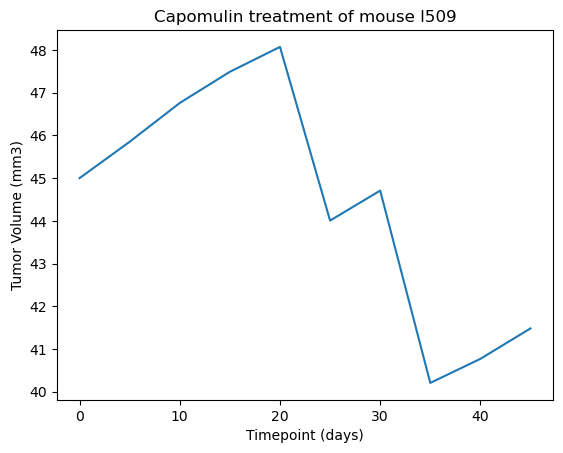

In [25]:
 # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mice_capomulin = data_analysis_df.loc[data_analysis_df['Drug Regimen'] == "Capomulin"]
    
mousedata = mice_capomulin.loc[mice_capomulin['Mouse ID']== 'l509']
    
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


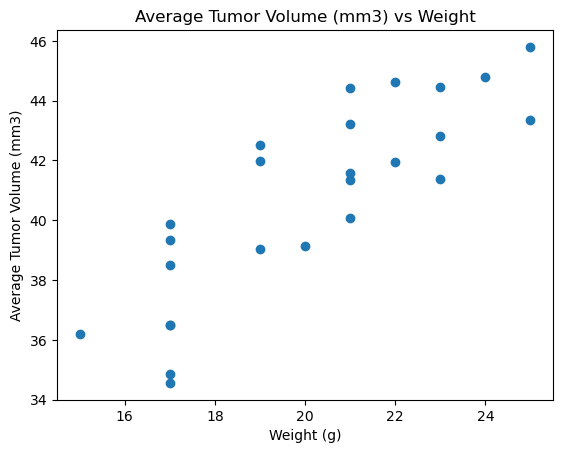

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
table_capomulin = data_analysis_df.loc[data_analysis_df['Drug Regimen'] == "Capomulin"]
average_capomulin = table_capomulin.groupby(['Mouse ID']).mean()
plt.scatter(average_capomulin['Weight (g)'],average_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


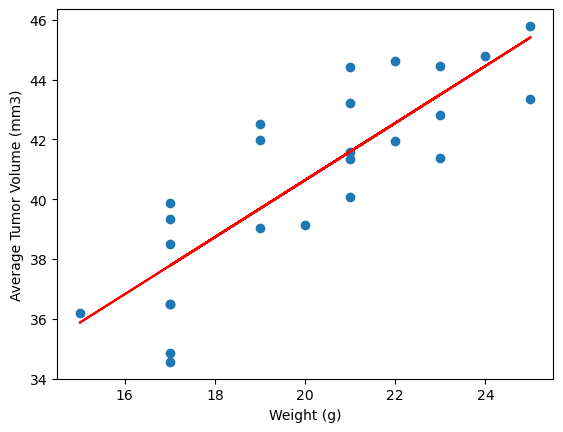

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(average_capomulin['Weight (g)'],average_capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(average_capomulin['Weight (g)'],average_capomulin['Tumor Volume (mm3)'])

y_values = average_capomulin['Weight (g)']*model[0]+model[1]
plt.scatter(average_capomulin['Weight (g)'],average_capomulin['Tumor Volume (mm3)'])
plt.plot(average_capomulin['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()